# Blue Apron Data Analysis - Yue Wu

- Part1: Data Cleaning and Initial Exploration
- Part2: Answers to 7 Questions

## Part 1 - Data Cleaning and Initial Exploration

### Import Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno  # show missing values in a data frame

### Load Data

In [2]:
customers = pd.read_csv('customers.csv')
order_his = pd.read_csv('order_history.csv')
subscriptions = pd.read_csv('subscriptions.csv')

## 1, Customers table
- The table has 112344 records and 10 columns.  
- Columns include customer_id, plan_type, is_churned, dish preferences, lifetime_value, and start_date.


In [3]:
df_c = customers
df_c.head(3)

,customer_id,plan_type,is_churned,pref_beef,pref_chicken,pref_fish,pref_lamb,pref_veg,lifetime_value,start_date
0,83781,2 Person,False,Beef,Chicken,No fish,Lamb,Vegetarian,259.232977,2014-12-28
1,66641,2 Person,False,No beef,No chicken,Fish,No lamb,Vegetarian,106.223258,2014-12-28
2,57263,2 Person,False,Beef,Chicken,No fish,Lamb,Vegetarian,428.400279,2014-12-28


In [4]:
df_c.shape

(112344, 10)

### Check & Clean duplicates

In [5]:
sum(df_c.duplicated())

13399

In [6]:
df_c = df_c[df_c.duplicated()==False]
df_c.shape

(98945, 10)

### Check data format
- 1 bool, 1 float, 1 int, 7 object variables

In [7]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98945 entries, 0 to 98944
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     98945 non-null  int64  
 1   plan_type       90049 non-null  object 
 2   is_churned      98945 non-null  bool   
 3   pref_beef       98945 non-null  object 
 4   pref_chicken    98945 non-null  object 
 5   pref_fish       98945 non-null  object 
 6   pref_lamb       98945 non-null  object 
 7   pref_veg        98945 non-null  object 
 8   lifetime_value  95781 non-null  float64
 9   start_date      98945 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 7.6+ MB


### Customer_id should be categorical. Start_date should be datetime

In [8]:
df_c['customer_id'] = df_c['customer_id'].astype('object')
df_c['start_date'] = pd.to_datetime(df_c['start_date'])
df_c.dtypes

customer_id               object
plan_type                 object
is_churned                  bool
pref_beef                 object
pref_chicken              object
pref_fish                 object
pref_lamb                 object
pref_veg                  object
lifetime_value           float64
start_date        datetime64[ns]
dtype: object

### Check missing values - 'plan_type' and 'lifetime_value' 

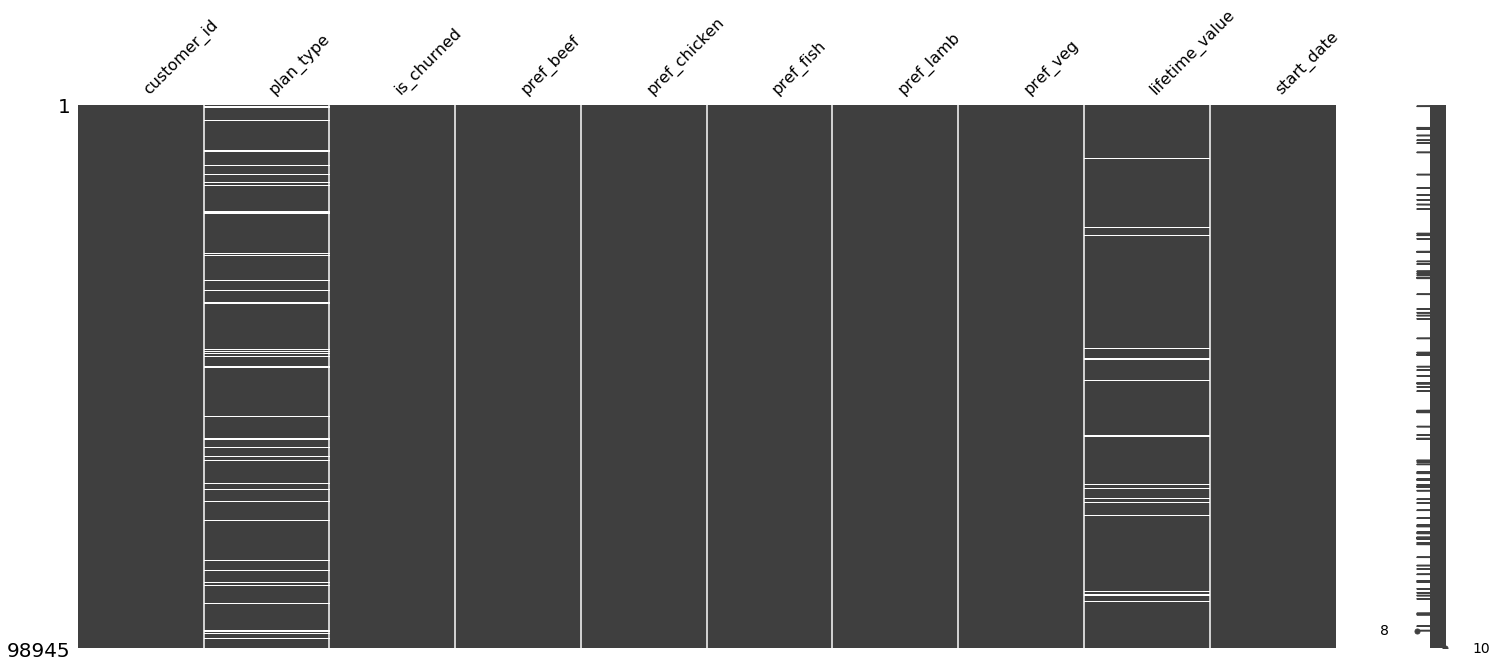

In [9]:
msno.matrix(df_c)

In [10]:
print("There are ",sum(df_c.plan_type.isnull()), "nulls in 'plan_type, and ", sum(df_c.lifetime_value.isnull()),"nulls in 'lifetime_value'.")

There are  8896 nulls in 'plan_type, and  3164 nulls in 'lifetime_value'.


### General View

In [11]:
df_c.describe(include = 'all')

,customer_id,plan_type,is_churned,pref_beef,pref_chicken,pref_fish,pref_lamb,pref_veg,lifetime_value,start_date
count,98945.0,90049,98945,98945,98945,98945,98945,98945,95781.000000,98945
unique,98945.0,2,2,2,2,2,2,2,NaN,36
top,98945.0,2 Person,False,Beef,Chicken,Fish,No lamb,Vegetarian,NaN,2015-02-22 00:00:00
freq,1.0,74288,95781,74235,79391,68710,64814,60903,NaN,2939
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-30 00:00:00
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.764467,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.556776,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.193709,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.463838,NaN


### Fun Facts of the Customers table: 
- Top choices are 2 person, beef, chicken, fish, no lamb, vegerian. 
- Start_date is from 2014-12-28 to 2015-8-30.
- More customers order for 2 person
- More customers are not churned.

People don't order lamb that much. Maybe lamb is a bit pricy?

## 2, Order_history

In [12]:
df_o = order_his
print(df_o.shape)
df_o.head(3)

(1289606, 4)


,subscription_id,order_received,delivery_week,cancellation_date
0,10000114,1.0,2015-05-10,NaN
1,10000114,1.0,2015-05-17,NaN
2,10000114,0.0,2015-05-24,NaN


### No duplicates in the orders table

In [13]:
sum(df_o.duplicated())

0

### Change Data to the Correct Format
- Subscription_id should be object
- Delivery_week, cancellation_date should be datetime

In [14]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289606 entries, 0 to 1289605
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   subscription_id    1289606 non-null  int64  
 1   order_received     1190661 non-null  float64
 2   delivery_week      1190661 non-null  object 
 3   cancellation_date  3164 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 39.4+ MB


In [15]:
# subscription_id
df_o.subscription_id = df_o.astype('object')

# delivery_week
df_o.delivery_week = pd.to_datetime(df_o.delivery_week)

# cancellation_date
df_o.cancellation_date = pd.to_datetime(df_o.cancellation_date)


### General View

In [16]:
df_o.describe(include='all')

,subscription_id,order_received,delivery_week,cancellation_date
count,1289606.0,1.190661e+06,1190661,3164
unique,98945.0,NaN,91,459
top,11298092.0,NaN,2015-08-23 00:00:00,2015-07-31 00:00:00
freq,61.0,NaN,33957,21
first,NaN,NaN,2015-01-04 00:00:00,2015-01-21 00:00:00
last,NaN,NaN,2016-09-25 00:00:00,2016-09-12 00:00:00
mean,NaN,5.036152e-01,NaN,NaN
std,NaN,4.999871e-01,NaN,NaN
min,NaN,0.000000e+00,NaN,NaN
25%,NaN,0.000000e+00,NaN,NaN


### Fun facts of the orders table
- There are 98945 unique subscription_id.
- Delivery week starts from 2015-1-4 to 2016-9-25.
- Cancellation starts from 2015-1-21 to 2016-9-12.

## 3, Subscriptions table
- Data in this table overlaps with Customers table. 
- 98945 rows, 4 columns.
- There is no duplicates or missing values.

In [17]:
df_s = subscriptions
df_s.head(3)

,subscription_id,customer_id,plan_type,protein_preferences
0,17244371,83781,2 Person,"Chicken,Beef,No fish,Lamb,Vegetarian"
1,17789427,66641,2 Person,"No chicken,No beef,Fish,No lamb,Vegetarian"
2,12058343,57263,2 Person,"Chicken,Beef,No fish,Lamb,Vegetarian"


In [18]:
print(df_s.shape)

(98945, 4)


In [19]:
sum(df_s.duplicated())

0

### Change customer_id, subscription_id from int to object

In [20]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98945 entries, 0 to 98944
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subscription_id      98945 non-null  int64 
 1   customer_id          98945 non-null  int64 
 2   plan_type            98945 non-null  object
 3   protein_preferences  98945 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.0+ MB


In [21]:
df_s['customer_id'] = df_s['customer_id'].astype('object')
df_s['subscription_id'] = df_s['subscription_id'].astype('object')
df_s.dtypes

subscription_id        object
customer_id            object
plan_type              object
protein_preferences    object
dtype: object

In [22]:
df_s.describe(include='all')

,subscription_id,customer_id,plan_type,protein_preferences
count,98945,98945,98945,98945
unique,98945,98945,3,32
top,11272191,98945,2 Person,"Chicken,Beef,Fish,No lamb,No vegetarian"
freq,1,1,74288,17630


## Part 1 Summary: Fun facts of the three table 

**Fact 1**  
Note that the unique records of customers, orders, and subscriptions are all **98945**. So the question is, do they match?

- Are all customers in the Customers table also in the Subscriptions table?
- Are all subscriptions in the Orders table also in the Subscriptions table?

In [23]:
print(set(df_c.customer_id) == set(df_s.customer_id))
print(set(df_s.subscription_id) == set(df_o.subscription_id))

True
True


**The answer is, YES!!** So in the next steps, I can merge these three tables without worries.

### Fact 2
As for plan_type, there are **2 unique values in the customers table**, but **3 unique values in the subscriptions table**. Given **Fact 1** that customers information is exactly the same, we can then __inpute missing values__ in df_c with df_s.

In [24]:
df_c.plan_type.value_counts(), df_s.plan_type.value_counts()

(2 Person    74288
 Family 2    15761
 Name: plan_type, dtype: int64,
 2 Person    74288
 Family 2    15761
 Family 4     8896
 Name: plan_type, dtype: int64)

In [25]:
df_c.drop(columns = ['plan_type'], inplace = True) 

In [26]:
df_c = df_c.merge(df_s[['customer_id', 'plan_type']], how = 'inner', on='customer_id')
df_c.head()

,customer_id,is_churned,pref_beef,pref_chicken,pref_fish,pref_lamb,pref_veg,lifetime_value,start_date,plan_type
0,83781,False,Beef,Chicken,No fish,Lamb,Vegetarian,259.232977,2014-12-28,2 Person
1,66641,False,No beef,No chicken,Fish,No lamb,Vegetarian,106.223258,2014-12-28,2 Person
2,57263,False,Beef,Chicken,No fish,Lamb,Vegetarian,428.400279,2014-12-28,2 Person
3,54411,False,No beef,Chicken,Fish,No lamb,Vegetarian,112.716498,2014-12-28,2 Person
4,13115,False,No beef,Chicken,No fish,No lamb,Vegetarian,386.592968,2014-12-28,2 Person


### Now there is no missing value in plan type.

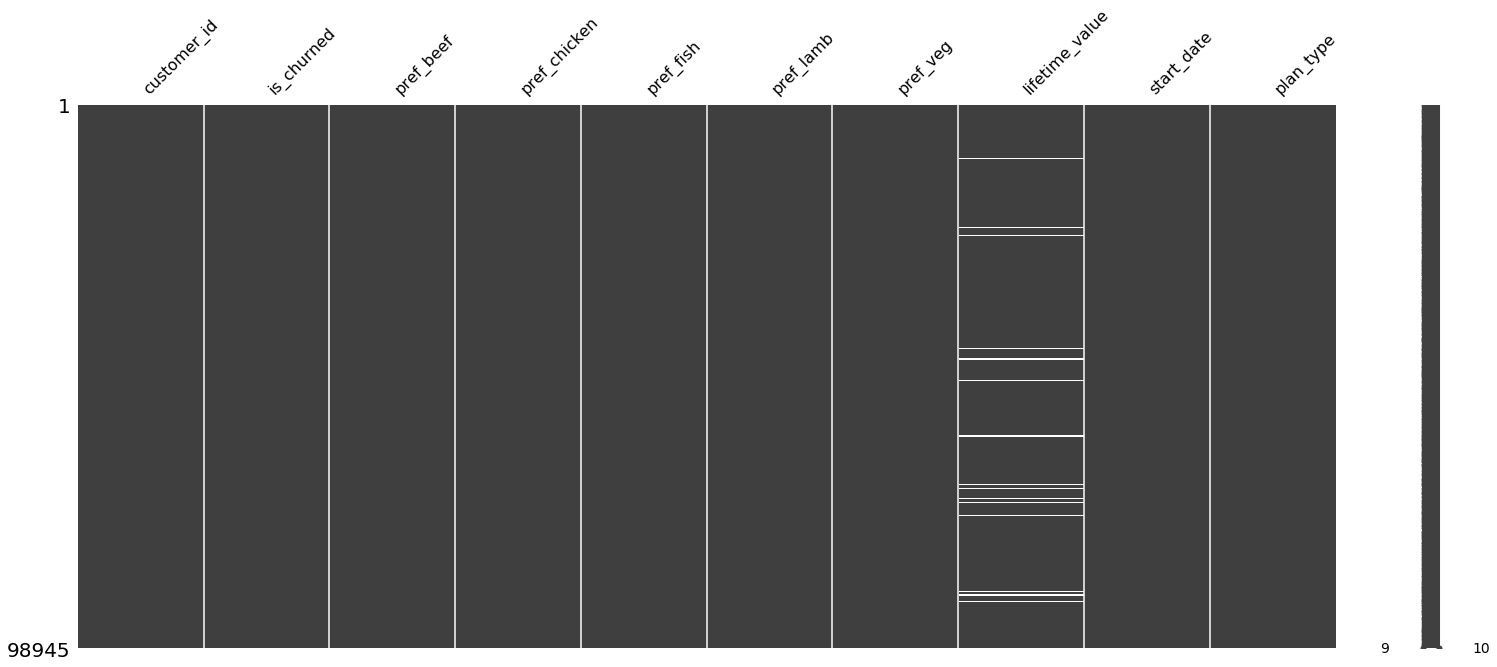

In [27]:
msno.matrix(df_c)

# Part 2 - Questions

## Q1 - Order Rate Distribution
Based on question 1: Order Rate = the fraction of weeks that a customer orders a Blue Apron box  
Refer to the **Order_history table** to answer this question


In [28]:
df_o.head(2)

,subscription_id,order_received,delivery_week,cancellation_date
0,10000114,1.0,2015-05-10,NaT
1,10000114,1.0,2015-05-17,NaT


In [29]:
odr = df_o.groupby(['subscription_id'])['order_received'].mean()
odr.name = 'Order Rate'

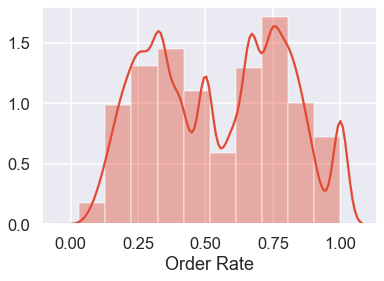

In [30]:
# plt.style.available
plt.style.use('ggplot')
sns.set_context('talk')
sns.set_style('darkgrid')

sns.distplot(odr, bins = 10)

## Q1 Summary 
- Two peaks of cusotmer order rate fall in the ranges of (0.3, 0.4) and (0.7,0.8)
- The most frequent order rate is somewhere in (0.7, 0.8)

## Q2 - Order Rate Distribution by plan_type and protein preferences

In [31]:
# Copy and Change index of the subscription table
df_temp = df_s.copy()
df_temp.set_index('subscription_id', inplace=True)

# Create a dataframe of order_rate
order_rate = pd.DataFrame(odr)

# Join these two tables
df_temp0 = df_temp.merge(order_rate, how = 'inner',on = 'subscription_id')
df_temp0.sort_index().head(3)

,customer_id,plan_type,protein_preferences,Order Rate
subscription_id,,,,
10000114,15776,2 Person,"Chicken,No beef,Fish,Lamb,Vegetarian",0.4
10000158,82857,2 Person,"Chicken,No beef,No fish,No lamb,No vegetarian",1.0
10000283,29092,2 Person,"No chicken,No beef,Fish,No lamb,No vegetarian",0.5


In [32]:
# Split the protein_preferences column

df_temp1 = df_temp0['protein_preferences'].str.split(',', expand = True)
df_temp1.columns = ['Chicken', 'Beef','Fish','Lamb','Vege']
df_temp1.head(2)

,Chicken,Beef,Fish,Lamb,Vege
subscription_id,,,,,
17244371,Chicken,Beef,No fish,Lamb,Vegetarian
17789427,No chicken,No beef,Fish,No lamb,Vegetarian


In [33]:
# Join the above expanded table with order_rate information
df_or = df_temp0[['customer_id','plan_type','Order Rate']].merge(df_temp1, how = 'inner',on = 'subscription_id')

# Round order_rate to 2 decimals
df_or['Order Rate'] = df_or['Order Rate'].apply(lambda x: round(x, 2)) 

df_or.head(2)

,customer_id,plan_type,Order Rate,Chicken,Beef,Fish,Lamb,Vege
subscription_id,,,,,,,,
17244371,83781,2 Person,0.75,Chicken,Beef,No fish,Lamb,Vegetarian
17789427,66641,2 Person,0.23,No chicken,No beef,Fish,No lamb,Vegetarian


## See the Distribution with Violin plot
- The reason of choosing violin plot is in that it combines the benefits of **boxplot and the kernel density estimation**. 

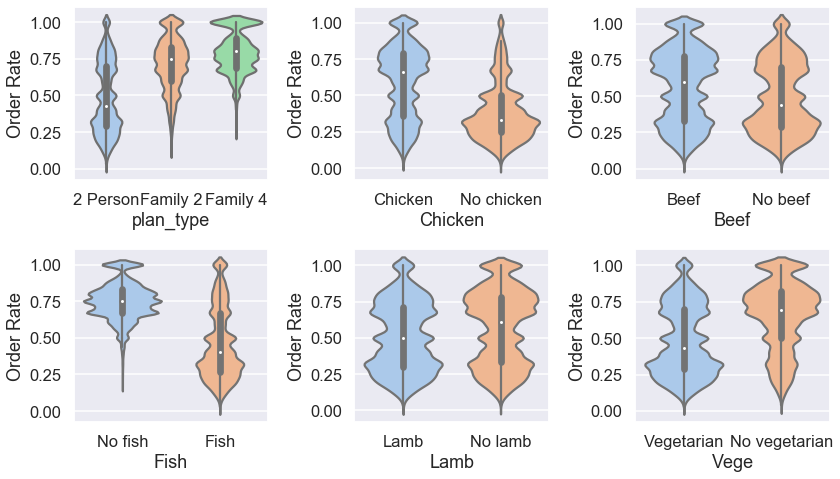

In [34]:
rows = 2
cols = 3

fig, ax = plt.subplots(nrows=rows, ncols = cols, figsize = (12, 7))

col = df_or[['plan_type','Chicken','Beef','Fish','Lamb','Vege']].columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.violinplot(x= df_or[col[index]], y='Order Rate', palette="pastel", data = df_or, ax = ax[i][j])
        index +=1

plt.tight_layout()

### Q2 Summary:

In terms of order rate among plan type and proteins:
- Family 4 wins.
- Chicken wins.
- Beef slightly wins.
- No fish wins.
- No lamb slight wins.
- No vegetarian wins.

## Q3 - Churn Distribution by plan_type and protein reference

- For example, for those who ordered for 2 person, what percentage of them churned?
- Use the customers table
- This is not churn rate.

In [35]:
df_c.head(2)

,customer_id,is_churned,pref_beef,pref_chicken,pref_fish,pref_lamb,pref_veg,lifetime_value,start_date,plan_type
0,83781,False,Beef,Chicken,No fish,Lamb,Vegetarian,259.232977,2014-12-28,2 Person
1,66641,False,No beef,No chicken,Fish,No lamb,Vegetarian,106.223258,2014-12-28,2 Person


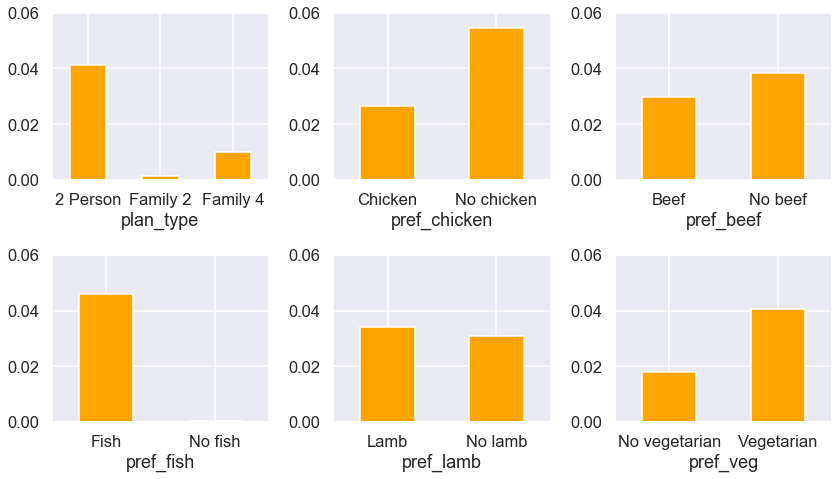

In [36]:
rows = 2
cols = 3

fig, ax = plt.subplots(nrows=rows, ncols = cols, figsize = (12, 7))
ylim = (0,0.06)
plt.setp(ax, ylim = ylim) 
col = df_c[['plan_type','pref_chicken','pref_beef','pref_fish','pref_lamb','pref_veg']].columns
index = 0

for i in range(rows):
    for j in range(cols):
        c1 = df_c.groupby([col[index]])['is_churned'].mean() 
        c1.plot(kind='bar', color = 'orange', ax = ax[i][j])

        for tick in ax[i][j].get_xticklabels():
            tick.set_rotation(0)  
        index +=1

plt.tight_layout()

## Q4: Do certain protein preferences perform better/worse within a plan type? 
If so, how should we treat those different groups?

Refer to the order rate table.   
Use **pointplot** and **countplot** to highlight protein preference differences among plan type groups.

In [37]:
df_or.head(2)

,customer_id,plan_type,Order Rate,Chicken,Beef,Fish,Lamb,Vege
subscription_id,,,,,,,,
17244371,83781,2 Person,0.75,Chicken,Beef,No fish,Lamb,Vegetarian
17789427,66641,2 Person,0.23,No chicken,No beef,Fish,No lamb,Vegetarian


### Order Rate of proteins across plan type - pointplot

Pointpoint clearly tells the change within different groups.

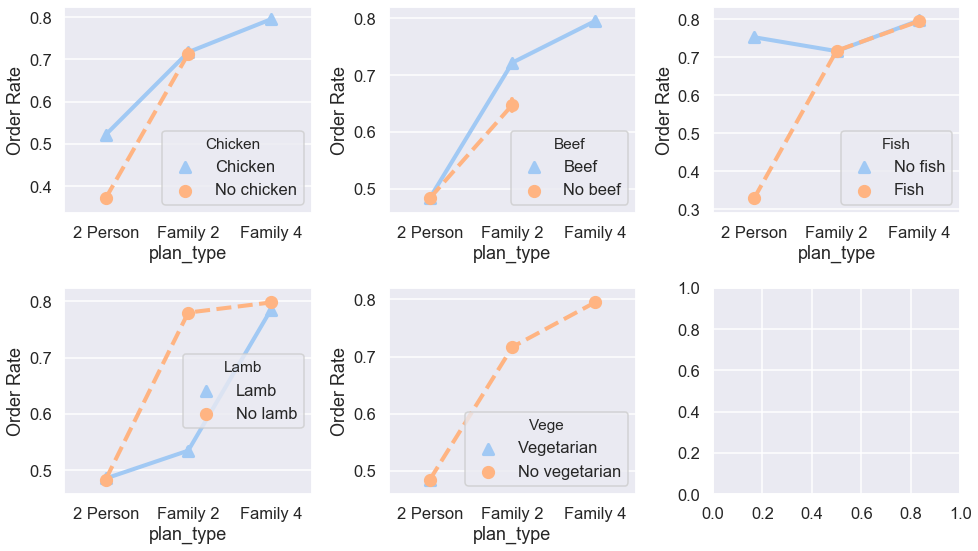

In [38]:
rows =2
cols = 3

fig, ax = plt.subplots(nrows=rows, ncols = cols, figsize = (14, 8))
col = df_or[['plan_type','Chicken','Beef','Fish','Lamb','Vege']].columns

index = 0
for i in range(cols):
    for j in range(cols):
        if index<6:
            if col[index]!='plan_type':
                index = index
            else:
                index = index +1
            sns.pointplot(x = 'plan_type', y='Order Rate', hue = df_or[col[index]], markers=["^", "o"], linestyles=["-", "--"], palette="pastel", data = df_or, ax = ax[i][j])
            index +=1 
        
plt.tight_layout()

### Order Rate of proteins across plan type - Split Violinplot
Split violinplot shows how different groups distribute by a certain category.

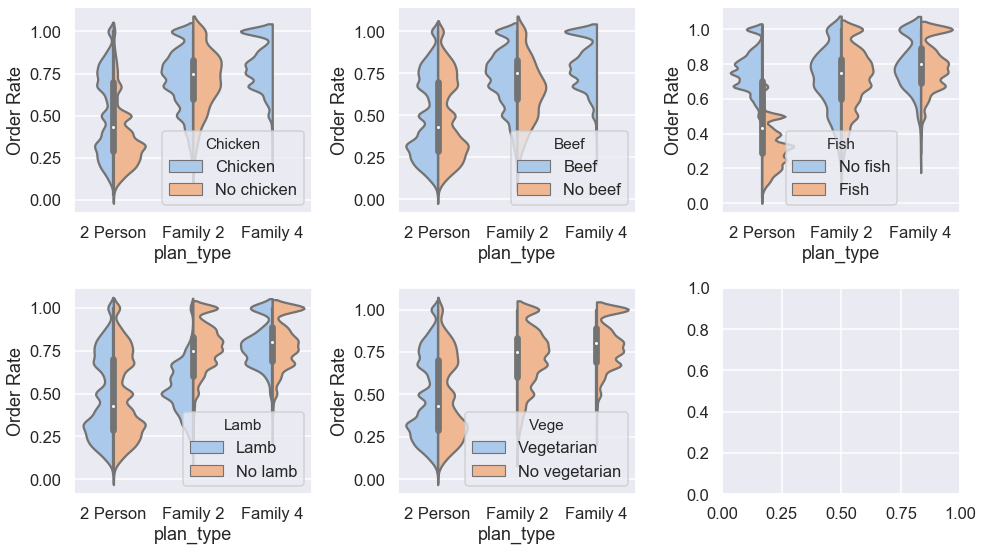

In [39]:
rows =2
cols = 3

fig, ax = plt.subplots(nrows=rows, ncols = cols, figsize = (14, 8))
col = df_or[['plan_type','Chicken','Beef','Fish','Lamb','Vege']].columns
# plt.setp(ax, ylim = (0,70000))
index = 0
for i in range(cols):
    for j in range(cols):
        if index<6:
            if col[index]!='plan_type':
                index = index
            else:
                index = index +1
            sns.violinplot(x = 'plan_type', y = 'Order Rate', hue = df_or[col[index]], split = True,  palette="pastel", data = df_or, ax = ax[i][j])
            index +=1 
        
plt.tight_layout()

### Order counts by proteins across plan type

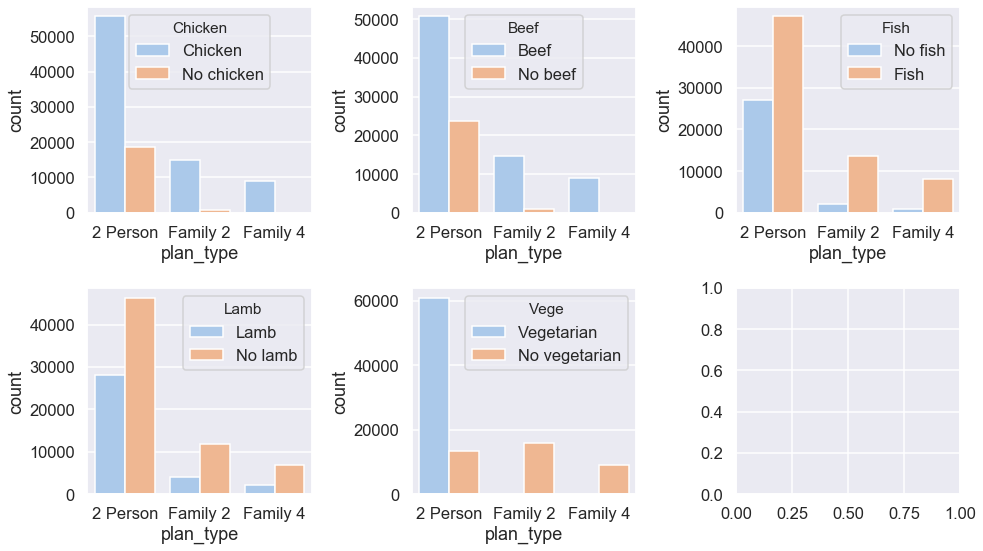

In [40]:
rows =2
cols = 3

fig, ax = plt.subplots(nrows=rows, ncols = cols, figsize = (14, 8))
col = df_or[['plan_type','Chicken','Beef','Fish','Lamb','Vege']].columns
# plt.setp(ax, ylim = (0,70000))
index = 0
for i in range(cols):
    for j in range(cols):
        if index<6:
            if col[index]!='plan_type':
                index = index
            else:
                index = index +1
            sns.countplot(x = 'plan_type',  hue = df_or[col[index]], palette="pastel", data = df_or, ax = ax[i][j])
            index +=1 
        
plt.tight_layout()

### A fun fact worth attentions:

In 2 Person group, **Order Rate** No Fish > Fish, while **Count** Fish > No Fish, it seems contradictory.  
A possible reason could be that, order rate relies more on **continuous buying** while count takes **all orders** into consideration, be it new or existing ones.   
Thus, we can look at order rate to know **loyal customers** whereas count for **general customers**.

### Q4 Recommendation for generating recipes targeting different groups:

- For general customers (Refer to Counts)
    - 2 Person: Chicken, Beef, Fish, No Lamb, Vegetarian  
    - Family 2 & 4: Chicken, Beef, Fish, No Lamb, No Vegetarian Only

- For loyal customers (Refer to Order Rate) 
    - For 2 person: highlight Chicken and No Fish.
    - For Family2, highlight Beef and No lamb
    - For Family4, Chicken only, Beef only, and No vegetarian only.

- In general, order rate for families is higher than 2 person.

## Q5: Do certain cohorts perform better across key performance indicators (KPIs)?

### 5-1: Top 3 cohorts by count

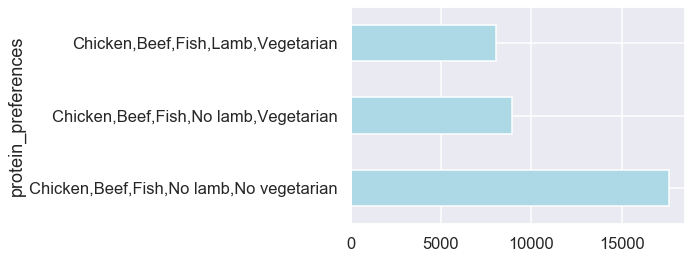

In [41]:
df_temp0.groupby('protein_preferences')['customer_id'].count().sort_values(ascending=False)[:3].plot.barh(color = 'lightblue', )

### 5-2: Top 3 cohorts by plan_type

In [42]:
grps = df_temp0.groupby(['plan_type'])['protein_preferences']#.value_counts()[:1].plot()

# 2 Person
g_2p = grps.get_group('2 Person').value_counts().sort_values(ascending=False)
print("Top cohort for 2 Person: ",g_2p[:1]);print()
# Family 2
g_2f = grps.get_group('Family 2').value_counts().sort_values(ascending=False)
print("Top cohort for Family 2: ",g_2f[:1]);print()
# Family 4
g_4f = grps.get_group('Family 4').value_counts().sort_values(ascending=False)
print("Top cohort for Family 4: ",g_4f[:1]);print()

Top cohort for 2 Person:  Chicken,Beef,Fish,No lamb,Vegetarian    8918
Name: protein_preferences, dtype: int64

Top cohort for Family 2:  Chicken,Beef,Fish,No lamb,No vegetarian    9547
Name: protein_preferences, dtype: int64

Top cohort for Family 4:  Chicken,Beef,Fish,No lamb,No vegetarian    6126
Name: protein_preferences, dtype: int64



### 5-3: Top 3 cohorts by average lifetime value

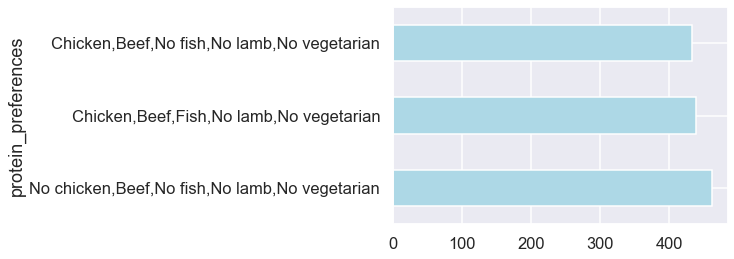

In [43]:
df_kpi = df_temp0.merge(df_c[['customer_id','is_churned','lifetime_value']], how = "inner", on = "customer_id")

df_kpi.groupby('protein_preferences')['lifetime_value'].mean().sort_values(ascending=False)[:3].plot.barh(color='lightblue')

## Q5 Summary:

- Winner by **counts**: Chicken,Beef,Fish,No lamb,No vegetarian
  
- Winner by **plan_type**: 
    - Chicken,Beef,Fish,No lamb,Vegetarian for 2 Person
    - Chicken,Beef,Fish,No lamb, No Vegetarian for Family 2/4  
    
- Winner by **average lifetime value**: No chicken,Beef,No fish,No lamb,No vegetarian


## Q6: Rethink LTV

#### Life Time Value Calculation based on existing data

`LTV = ARPU / churn_rate`  
`ARPU (average revenue per user) = order rate * revenue_per_order`

- **order rate**: how likely a person is to order every week, considering that they can skip meals
- **revenue_per_order**: assume \$9.99 per serving per person for 2 person and family 2, while $8.99 for family 4
- **churn_rate**: as the name suggests.

### Prepare Data 

In [44]:
df_or.head(2)
# df_or.describe(include='all')

,customer_id,plan_type,Order Rate,Chicken,Beef,Fish,Lamb,Vege
subscription_id,,,,,,,,
17244371,83781,2 Person,0.75,Chicken,Beef,No fish,Lamb,Vegetarian
17789427,66641,2 Person,0.23,No chicken,No beef,Fish,No lamb,Vegetarian


In [45]:
df_ltv = df_c.merge(df_or[['customer_id','Order Rate']], how = 'left', on = 'customer_id')
print(df_ltv.shape)
df_ltv.head(3)

(98945, 11)


,customer_id,is_churned,pref_beef,pref_chicken,pref_fish,pref_lamb,pref_veg,lifetime_value,start_date,plan_type,Order Rate
0,83781,False,Beef,Chicken,No fish,Lamb,Vegetarian,259.232977,2014-12-28,2 Person,0.75
1,66641,False,No beef,No chicken,Fish,No lamb,Vegetarian,106.223258,2014-12-28,2 Person,0.23
2,57263,False,Beef,Chicken,No fish,Lamb,Vegetarian,428.400279,2014-12-28,2 Person,0.79


In [46]:
# Start date is from 2014-12-28 to 2015-8-30
df_c.start_date.describe()

count                   98945
unique                     36
top       2015-02-22 00:00:00
freq                     2939
first     2014-12-28 00:00:00
last      2015-08-30 00:00:00
Name: start_date, dtype: object

In [47]:
# Cancellation date is from 2015-5-28 to 2016-9-12
df_o.cancellation_date.describe()

count                    3164
unique                    459
top       2015-07-31 00:00:00
freq                       21
first     2015-01-21 00:00:00
last      2016-09-12 00:00:00
Name: cancellation_date, dtype: object

### Calculate churn rate 

Based on the initial exploration, orders history table contains the exact group of customer as what's in the customer table.   
So treat the whole timespan as if it is a single time window, churn rate can be simplified as:

`churn rate = churns / number of customers`

In [48]:
churn_rate0 = round(df_ltv.is_churned.sum() / df_ltv.shape[0],4)
churn_rate0

0.032

### Calculate an updated LTV

In [49]:
df_ltv_updated = df_ltv.copy()

# 2 person - $9.99 per serving / person
df_ltv_updated_2p = df_ltv_updated[df_ltv_updated['plan_type'] == '2 Person']
df_ltv_updated_2p['ltv'] = 2*9.99*df_ltv_updated_2p['Order Rate']/churn_rate0

# family 2 - $9.99 per serving / person
df_ltv_updated_2f = df_ltv_updated[df_ltv_updated['plan_type'] == 'Family 2']
df_ltv_updated_2f['ltv'] = 2*9.99*df_ltv_updated_2f['Order Rate']/churn_rate0

# family 4 - $8.99 per serving / person
df_ltv_updated_4f = df_ltv_updated[df_ltv_updated['plan_type'] == 'Family 4']
df_ltv_updated_4f['ltv'] = 2*8.99*df_ltv_updated_4f['Order Rate']/churn_rate0

# combine tables
df_new = pd.concat([df_ltv_updated_2p, df_ltv_updated_2f, df_ltv_updated_4f])
df_new.head()

,customer_id,is_churned,pref_beef,pref_chicken,pref_fish,pref_lamb,pref_veg,lifetime_value,start_date,plan_type,Order Rate,ltv
0,83781,False,Beef,Chicken,No fish,Lamb,Vegetarian,259.232977,2014-12-28,2 Person,0.75,468.28125
1,66641,False,No beef,No chicken,Fish,No lamb,Vegetarian,106.223258,2014-12-28,2 Person,0.23,143.60625
2,57263,False,Beef,Chicken,No fish,Lamb,Vegetarian,428.400279,2014-12-28,2 Person,0.79,493.25625
3,54411,False,No beef,Chicken,Fish,No lamb,Vegetarian,112.716498,2014-12-28,2 Person,0.40,249.75000
4,13115,False,No beef,Chicken,No fish,No lamb,Vegetarian,386.592968,2014-12-28,2 Person,0.67,418.33125


### See the difference between lifetime_value and an updated ltv 

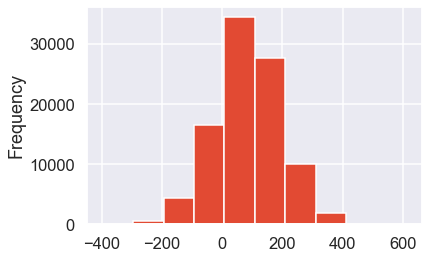

In [50]:
df_new['diff'] = df_new['ltv']- df_new['lifetime_value'] 
df_new['diff'].plot.hist()

### See the difference between lifetime_value and an updated ltv by plan type category

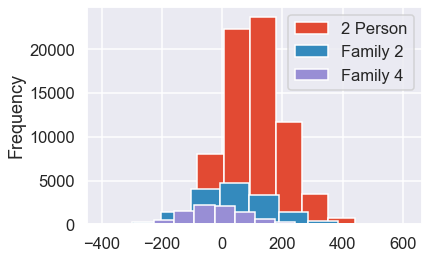

In [51]:
df_new.groupby('plan_type')['diff'].plot.hist()
plt.legend()

In [48]:
df_new.shape

(90049, 10)

## Q6 Potential Explaination for LTV differences

As shown above, the updated LTV is in **higher than** the old ones, and the difference mainly falls in (0, 200).   

This is highly reasonable.   
- Because, the updated LTV only considers the very **basic elements like order rate, churns**, but there are other marketing factors that would decrease LTV, like **discount and acquisition cost**.

- Also, the assumed price of orders are based on the prices in **2020** on Blue Apron's website, but the data is from **2015**. Apparently, **food was not as expensive as it is now**, which would be why the differences mainly lie in a negative area.

- Lastly, **churn rate may be underestimated** here. Because it only considers customers who have left, but we don't know if existing customers would churn in the future. Thus LVT is likely to be overestimated.


## Q7: If Blue Apron wasn't a subscription based company, how would LTV be different?

Traditionally: 
- LTV = Average sales per transaction \* Num of transactions \* Retention time period

## The End, thanks for viewing : ) 

In [243]:

# Other trials to solve Q6, abandoned.

# customers_per_week = df_ltv.resample('W-Mon', on='start_date')['customer_id'].count()
# churns_per_week = df_ltv.resample('W-Mon', on='cancellation_date')['customer_id'].count()
# churn_rate = round(churns_per_week/customers_per_week,3)
# churn_rate.name = 'churn_rate'